# k-nearest neighbors

In [ ]:
!pip install scikit_learn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\riddh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Shape of X_new: (3, 2)
Prediction: [0 0 0]


In [3]:
# Example feature data (X_new)
X_new = np.array([[56.8, 17.5], [24.4, 24.1], [50.1, 10.9]])

# Example target labels (y), assuming 3 samples with random labels
y = np.array([0, 1, 0])  # Replace with your actual target values

# Check the shape of X_new
print("Shape of X_new:", X_new.shape)

# Initialize the KNeighborsClassifier with n_neighbors=3 (or less, depending on your data)
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model using both features (X_new) and target labels (y)
knn.fit(X_new, y)

# Make predictions on the same data
prediction = knn.predict(X_new)

# Print the predictions
print(f"Prediction: {prediction}")


Shape of X_new: (3, 2)
Prediction: [0 0 0]


# Train/Test Split

In [ ]:
# built-in dataset of iris in sklearn
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
print("Iris dataset loaded:")
print("X shape:", X.shape)
print("y shape:", y.shape)

Iris dataset loaded:
X shape: (150, 4)
y shape: (150,)


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

0.9555555555555556


## Model Complexity

- **Larger k**: Less complex model → Underfitting  
- **Smaller k**: More complex model → Overfitting

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.9666666666666667, np.int64(3): 0.95, np.int64(4): 0.9583333333333334, np.int64(5): 0.9666666666666667, np.int64(6): 0.9666666666666667, np.int64(7): 0.975, np.int64(8): 0.9583333333333334, np.int64(9): 0.9666666666666667, np.int64(10): 0.9833333333333333, np.int64(11): 0.9583333333333334, np.int64(12): 0.975} 
 {np.int64(1): 1.0, np.int64(2): 1.0, np.int64(3): 1.0, np.int64(4): 1.0, np.int64(5): 1.0, np.int64(6): 1.0, np.int64(7): 0.9666666666666667, np.int64(8): 1.0, np.int64(9): 1.0, np.int64(10): 1.0, np.int64(11): 1.0, np.int64(12): 1.0}


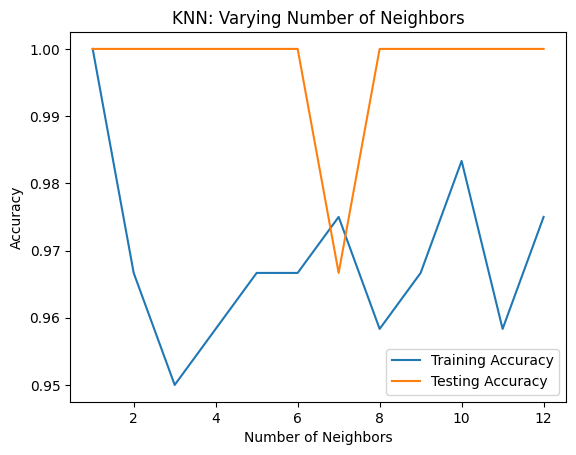

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create neighbors (values from 1 to 12)
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X_train, y_train)
  
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# Print accuracy dictionaries
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

# Plot the results
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()
